In [14]:
import pandas as pd

In [15]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [16]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: xlabel='date'>

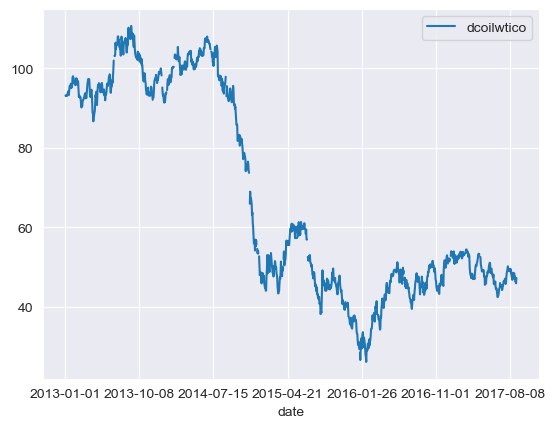

In [17]:
oil.set_index(oil["date"]).plot()

<Axes: >

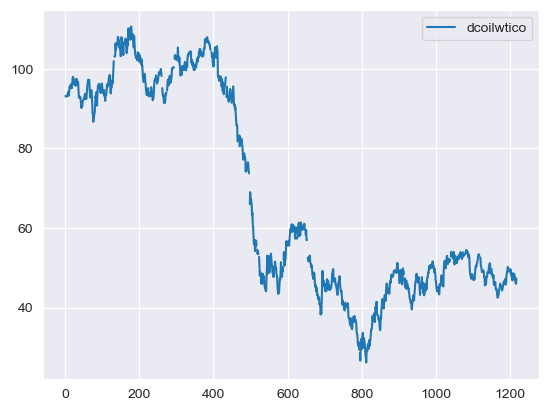

In [18]:
oil.plot()

<Axes: xlabel='date'>

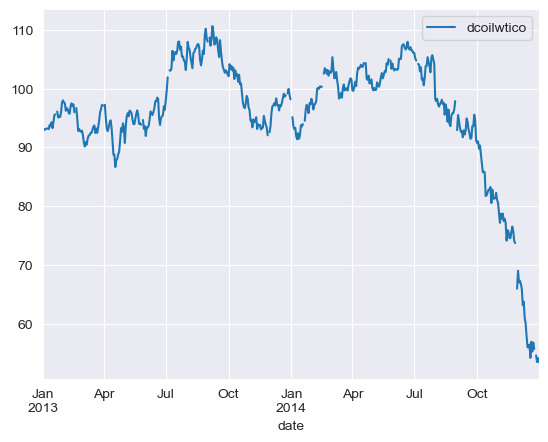

In [19]:
oil.astype({"date":"datetime64"}).set_index("date").loc["2013":"2014"].plot()

<Axes: xlabel='date'>

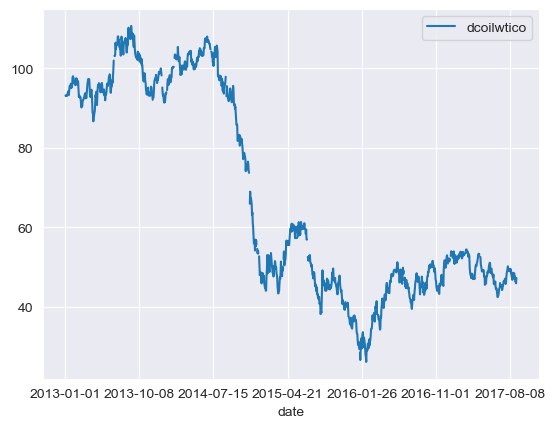

In [20]:
oil.plot(x='date')

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [21]:
import seaborn as sns
sns.set_style("darkgrid")

In [22]:
oil = oil.rename(columns={"dcoilwtico": "Oil Price"})

<Axes: title={'center': 'Oil Price 2013-2017'}, xlabel='Date', ylabel='USD Price'>

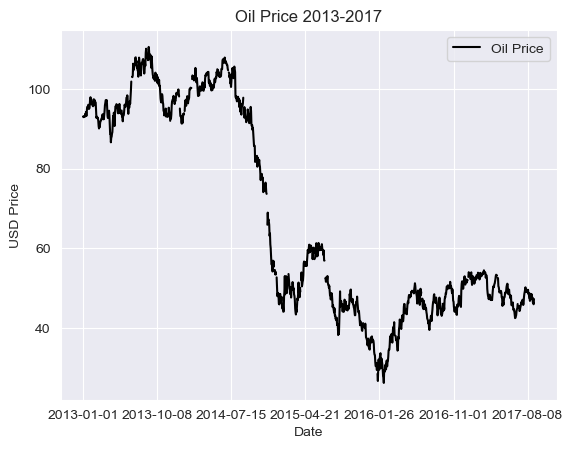

In [23]:
oil.set_index(oil["date"]).plot(
    title="Oil Price 2013-2017",
    xlabel="Date",
    ylabel="USD Price",
    c="Black"
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 line plot of transactions vs time, with one plot for each store.

Thanks!

In [29]:
transactions = pd.read_csv("../retail/transactions.csv")
stores_1234 = (pd.read_csv("../retail/transactions.csv")
     .loc[transactions["store_nbr"].isin([1,2,3,4])]
     .pivot_table(index="date", columns="store_nbr")
     .droplevel(0, axis=1)
)
    

In [30]:
# stores_1234 = (
#      transactions.loc[transactions["store_nbr"].isin([1,2,3,4])]
#      .pivot_table(index="date", columns="store_nbr")
#      .droplevel(0, axis=1)
# )

array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

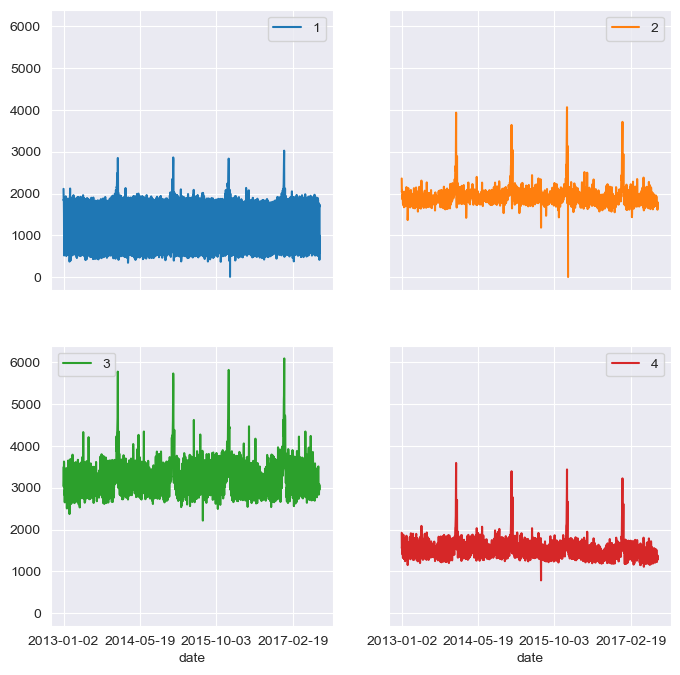

In [31]:
stores_1234.plot(subplots=True,
                layout=(2, 2),
                figsize=(8,8),
                sharey=True)


# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [33]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: xlabel='store_nbr'>

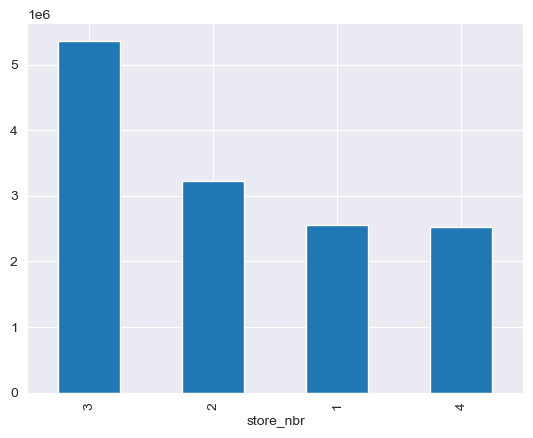

In [38]:
stores_1234.sum().sort_values(ascending=False).plot.bar()

In [35]:
# stores_1234.index.month will allow you to groupby the month! You can also slice it.
stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


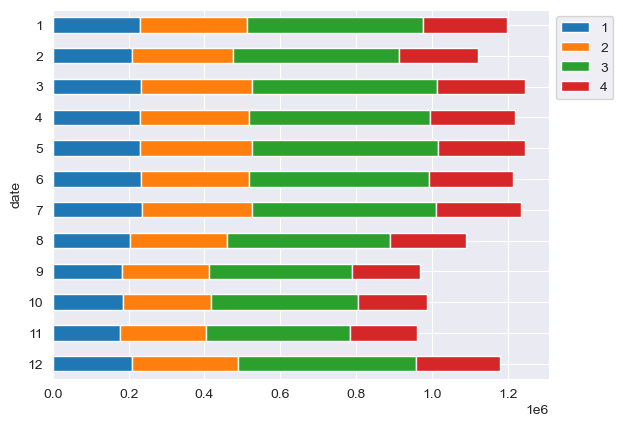

In [44]:
(stores_1234_monthly
    .sort_index(ascending=False)
    .plot.barh(stacked=True)
    .legend(bbox_to_anchor=(1, 1)))

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [45]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='3', ylabel='2'>

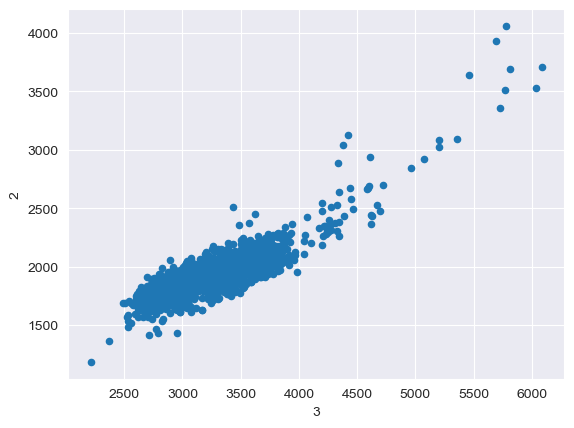

In [47]:
stores_1234.plot.scatter(x=3, y=2)

<Axes: xlabel='3', ylabel='2'>

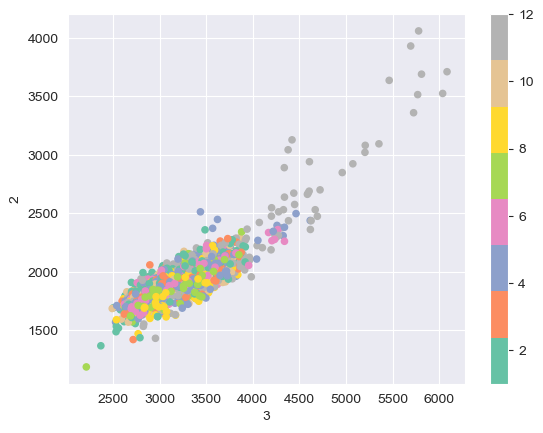

In [48]:
stores_1234.plot.scatter(x=3, y=2, c=stores_1234.index.month, cmap="Set2")

<Axes: >

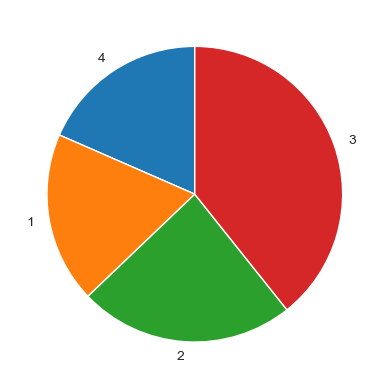

In [51]:
stores_1234.sum().sort_values(ascending=True).plot.pie(startangle=90)

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [61]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

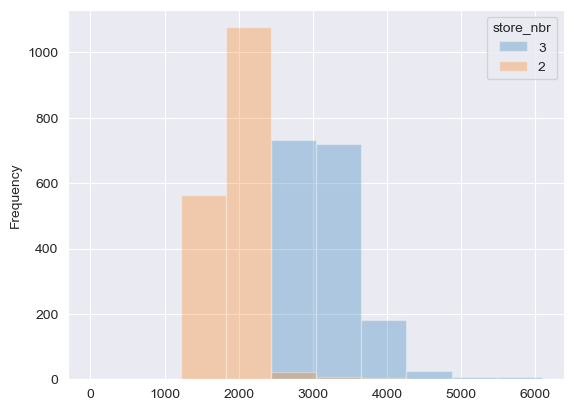

In [66]:
stores_1234.loc[:, [3, 2]].plot.hist(alpha=.3)